In [ ]:
import pandas as pd
import numpy as np
import math
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
from nltk.corpus import wordnet

synsets = list(wordnet.all_synsets())

words = set()

for synset in synsets:
    for lemma in synset.lemmas():
        if not lemma.name().isalpha():
          continue
        words.add(lemma.name())

data = pd.DataFrame(words)
print(len(data))

78865


In [ ]:
with open('wordnet_corpus.txt', 'w') as f:
    for line in words:
        # f.write(data[line][1])
        # print(data[line])
        f.write(line)
        f.write('\n')

In [ ]:

test_data_dict = {}

test_data =pd.read_csv("/content/drive/MyDrive/archive (1)/aspell.txt",sep=":", header=None, dtype=str)

# print(test_data.head())
print(len(test_data))

for i in range(len(test_data)):
  p1=test_data.iloc[i,0]
  p2 = test_data.iloc[i,1]
  p2 = p2[1:].split(" ")
  if len(p2)>1:
    continue
  p2 = p2[0]
  if not (p1.isalpha() and p2.isalpha()):
    continue
  test_data_dict[p1.lower()] = p2.lower()

# print(test_data_dict)

450


In [ ]:
def min_edit_distance(source, target):
  ins_cost = 1
  del_cost = 1
  rep_cost = 1
  
  m = len(source) 
  n = len(target) 
  
  D = np.zeros((m+1, n+1), dtype=int) 
  
  for row in range(1,m+1): 
      D[row,0] = D[row-1,0] + del_cost
      
  for col in range(1,n+1): 
      D[0,col] = D[0,col-1] + ins_cost
      
  for row in range(1,m+1): 
      
      for col in range(1,n+1):
          
          r_cost = rep_cost
          
          if source[row-1] == target[col-1]:
              r_cost = 0
              
          D[row,col] = min([D[row-1,col]+del_cost, D[row,col-1]+ins_cost, D[row-1,col-1]+r_cost])
        
  med = D[m,n]
  
  return med

In [ ]:
def encode_word(s1,key_value):

  v=0
  for i in s1:
    v+=key_value[i.lower()]
    
  return v

In [ ]:
def create_value_word(data,value_word,key_value):

  for i in range(len(data)):
    s1= data.iloc[i,0]

    # print(i)
    
    if not s1.isalpha():
      continue

    v = encode_word(s1,key_value)

    value_word[v] = value_word.get(v, []) 
    value_word[v].append(s1)
  return value_word
   

In [ ]:
def create_key_value(pair):
  start = pair[0]
  i = 0
  j = 0
  adj_change = 2
  row_change = 3
  key_value = {}
  
  keyboard = ["qwertyuiop","asdfghjkl","zxcvbnm"]
  
  for i,a in enumerate(keyboard):  
    if start in a:
      j = a.index(start)
      break
  # print(i,j)
    
  l1 = [0,1,2]

  for k_i in l1:
    h = abs(i-k_i)
    for k_j,k_a in enumerate(keyboard[k_i]):
      key_value[k_a] = abs(k_j - j)*adj_change + h*row_change
  # print(key_value)
  
  
  start = pair[1]
  i = 0
  j = 0
  
  for i,a in enumerate(keyboard):  
    if start in a:
      j = a.index(start)
      break
  # print(i,j)
    
  l1 = [0,1,2]

  for k_i in l1:
    h = abs(i-k_i)
    for k_j,k_a in enumerate(keyboard[k_i]):
      key_value[k_a] =min(abs(k_j - j)*adj_change + h*row_change ,key_value[k_a])
  # print(key_value)
  return key_value


In [ ]:
def optimize(test_data_dict):
  
  min_v = 100000
  min_key_value = {}
  min_pair = []

  pairs = []
  
  letters = "abcdefghifklmnopqrstuvwxyz"
  
  for i in range(len(letters)):
    for j in range(i,len(letters)):
      pairs.append([letters[i],letters[j]])
  
  for pair in pairs:  
    
    key_value = create_key_value(pair)
    
    v = 0
    
    for p1 in test_data_dict:
      v += abs(encode_word(p1,key_value)-encode_word(test_data_dict[p1],key_value))
    
    if v<min_v:
      min_v = v
      min_pair = pair
      min_key_value = key_value 
    # print(pair,min_pair,v,min_v)

  print(min_pair)
  return min_key_value

key_value = optimize(test_data_dict)


['d', 'u']


In [ ]:
def letter_length_error(test_data_dict, key_value):
  
  letter_error = {}
  
  for i in range(1,14):
    n = 0
    v = 0
    
    for j in test_data_dict:
      p1 = j
      p2 = test_data_dict[j]

      if len(p1) != i:
        continue
      
      n += 1
      v += abs(encode_word(p1,key_value) - encode_word(test_data_dict[p1],key_value))
    
    if n!=0:
      letter_error[i]=v/n

  return letter_error

# print(test_data_dict)
letter_error = letter_length_error(test_data_dict,key_value)
letter_error


{2: 2.0,
 3: 1.8,
 4: 3.6666666666666665,
 5: 2.1842105263157894,
 6: 3.688888888888889,
 7: 2.9855072463768115,
 8: 2.909090909090909,
 9: 4.0625,
 10: 4.162162162162162,
 11: 4.166666666666667,
 12: 4.380952380952381,
 13: 9.125}

In [ ]:
value_word = {}
create_value_word(data,value_word,key_value)
print()

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


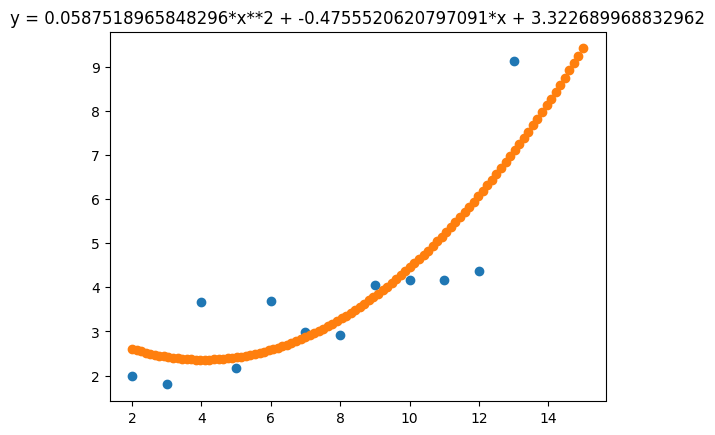

In [ ]:

def func(x, a, b, c):
    return a * x**2 + b * x + c
print(list(letter_error.keys()))
x = 3
xdata = list(letter_error.keys())
ydata = list(letter_error.values())

popt, pcov = curve_fit(func, xdata, ydata)

# print('a =', popt[0], ', b =', popt[1], ', c =', popt[2])

eqn = f'y = {popt[0]}*x**2 + {popt[1]}*x + {popt[2]}'

x=np.linspace(2,15,100)
y = popt[0]*x**2 + popt[1]*x + popt[2]

plt.scatter(xdata,ydata)
plt.scatter(x,y)
plt.title(eqn)
def threshold(x):
  return math.floor(popt[0]*x**2 + popt[1]*x + popt[2])

# math.floor(popt[0]*x**2 + popt[1]**x + popt[2])

y = 0.0587518965848296*x**2 + -0.4755520620797091*x + 3.322689968832962


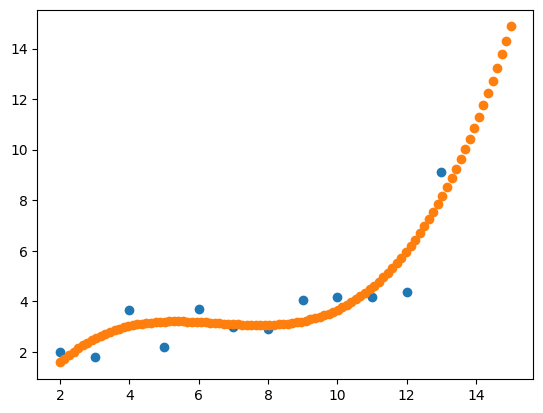

In [ ]:


def func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c*x + d


x = 3

xdata = list(letter_error.keys())
ydata = list(letter_error.values())

popt, pcov = curve_fit(func, xdata, ydata)

# print('a =', popt[0], ', b =', popt[1], ', c =', popt[2])

# eqn = f'y = {popt[0]}*x**3 + {popt[1]}*x**2 + {popt[2]}*x + {popt[3]}'
print(eqn)
x=np.linspace(2,15,100)
y = popt[0]*x**3 + popt[1]*x**2 + popt[2]*x +popt[3]
plt.scatter(xdata,ydata)
plt.scatter(x,y)


# math.floor(popt[0]*x**2 + popt[1]**x + popt[2])

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]


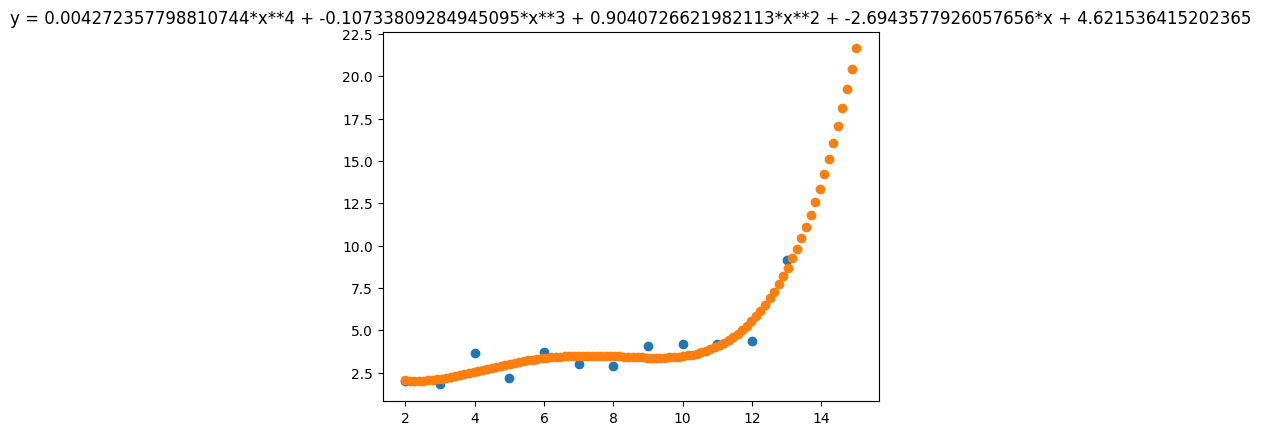

In [ ]:


def func(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c*x**2 + d*x + e

print(list(letter_error.keys()))
x = 3
xdata = list(letter_error.keys())
ydata = list(letter_error.values())

popt, pcov = curve_fit(func, xdata, ydata)

# print('a =', popt[0], ', b =', popt[1], ', c =', popt[2])

eqn = f'y = {popt[0]}*x**4 + {popt[1]}*x**3 + {popt[2]}*x**2 + {popt[3]}*x + {popt[4]}'
x=np.linspace(2,15,100)
y = popt[0]*x**4 + popt[1]*x**3 + popt[2]*x**2 +popt[3]*x + popt[4]
plt.scatter(xdata,ydata)
plt.scatter(x,y)
plt.title(eqn)

def threshold(x):
  return math.ceil(popt[0]*x**4 + popt[1]*x**3 + popt[2]*x**2 +popt[3]*x + popt[4])
# math.floor(popt[0]*x**2 + popt[1]**x + popt[2])

In [ ]:
# def threshold(x):
#   # return math.ceil(0.0483816 * x**2 + 0.164845 * x + 4.56322)
#   return math.floor(0.0334406*x**2 + 0.0727147*x + 1.86359)

In [ ]:
def find_accurate_word(s,key_value,value_word):
  start = time.time()
  v=encode_word(s,key_value)

  mi = v - math.floor(threshold(len(s)))
  ma = v + math.ceil(threshold(len(s)))

  # mi = v - len(s)
  # ma = v + len(s)
  
  print(len(data))
  
  a=[]

  for i in range(mi,ma+1):
    for j in value_word.get(i,[]):
      a.append([i,j])

  b=[]
  print(len(a))

  for i in a:
    b.append([min_edit_distance(s,i[1]),abs(i[0]-v),i[1]])
  b = sorted(b, key=lambda x: (x[0],x[1]))
  
  d=[]
  c=0
  for i in b:
    if c==5:
      break
    if i[-1][0]==s[0]:
      d.append(i)
      c+=1
      
  print(time.time() - start)
  return b[:5]
      
  # print(len(d))
  # print(d)

  return d[:5]



In [ ]:
def find_word(s,key_value,value_word):
  
  start = time.time()
  
  b=[]
  print(len(data))
  for i in value_word:
    for j in value_word[i]:
      b.append([min_edit_distance(s,j),j])
  b = sorted(b, key=lambda x: (x[0]))
  
  d=[]
  c=0
  for i in b:
    if c==5:
      break
    if i[-1][0]==s[0]:
      d.append(i)
      c+=1
      
  print(time.time() - start)
  return b[:5]
      
  # print(len(d))
  # print(d)

  return d[:5]



In [ ]:
test = 'indepandnt' 
result = find_accurate_word(test,key_value,value_word)


print("The suggested words for ",test )
for i in result:
  print(i)

78865
15689
2.524066925048828
The suggested words for  indepandnt
[2, 2, 'independent']
[4, 0, 'undemanding']
[4, 3, 'indignant']
[4, 3, 'independency']
[4, 4, 'independence']


In [ ]:
result = find_word(test,key_value,value_word)

print("The suggested words for ",test )

for i in result:

  print(i[-1])


78865
12.200870752334595
The suggested words for  indepandnt
independent
independence
dependant
deponent
independency


In [ ]:
# d=[]
# for i in c:
#   if i[-1][0]==s[0]:
#     d.append(i)
    
# print(len(d))
# d
